# Neural Networks on California Housing Data

### Imports


In [7]:
from house_value_regression import *
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset

## Read in dataset

In [11]:
housing_data = pd.read_csv('housing.csv')
print(housing_data.describe())


         longitude      latitude  housing_median_age   total_rooms  \
count  16512.00000  16512.000000        16512.000000  16512.000000   
mean    -119.55943     35.617896           28.669331   2639.225654   
std        2.00348      2.134056           12.615046   2198.453859   
min     -124.35000     32.540000            1.000000      2.000000   
25%     -121.78250     33.930000           18.000000   1446.000000   
50%     -118.49000     34.250000           29.000000   2122.000000   
75%     -118.00000     37.710000           37.000000   3143.000000   
max     -114.31000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    16344.000000  16512.000000  16512.000000    16512.00000   
mean       538.522026   1425.169513    499.902616        3.87329   
std        425.256071   1147.038029    385.367776        1.91235   
min          1.000000      3.000000      1.000000        0.49990   
25%        295.000000    788.

In [10]:
print(housing_data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -117.61     34.13                21.0       8416.0          1386.0   
1    -117.37     33.98                52.0        201.0            44.0   
2    -118.34     33.89                36.0       2274.0           411.0   
3    -118.92     35.13                29.0       1297.0           262.0   
4    -121.80     37.23                18.0       3179.0           526.0   

   population  households  median_income ocean_proximity  median_house_value  
0      4308.0      1341.0         4.4611          INLAND            164600.0  
1       130.0        24.0         2.0250          INLAND            125000.0  
2      1232.0       423.0         5.3730       <1H OCEAN            244500.0  
3       909.0       253.0         1.9236          INLAND            106300.0  
4      1663.0       507.0         5.9225       <1H OCEAN            265800.0  


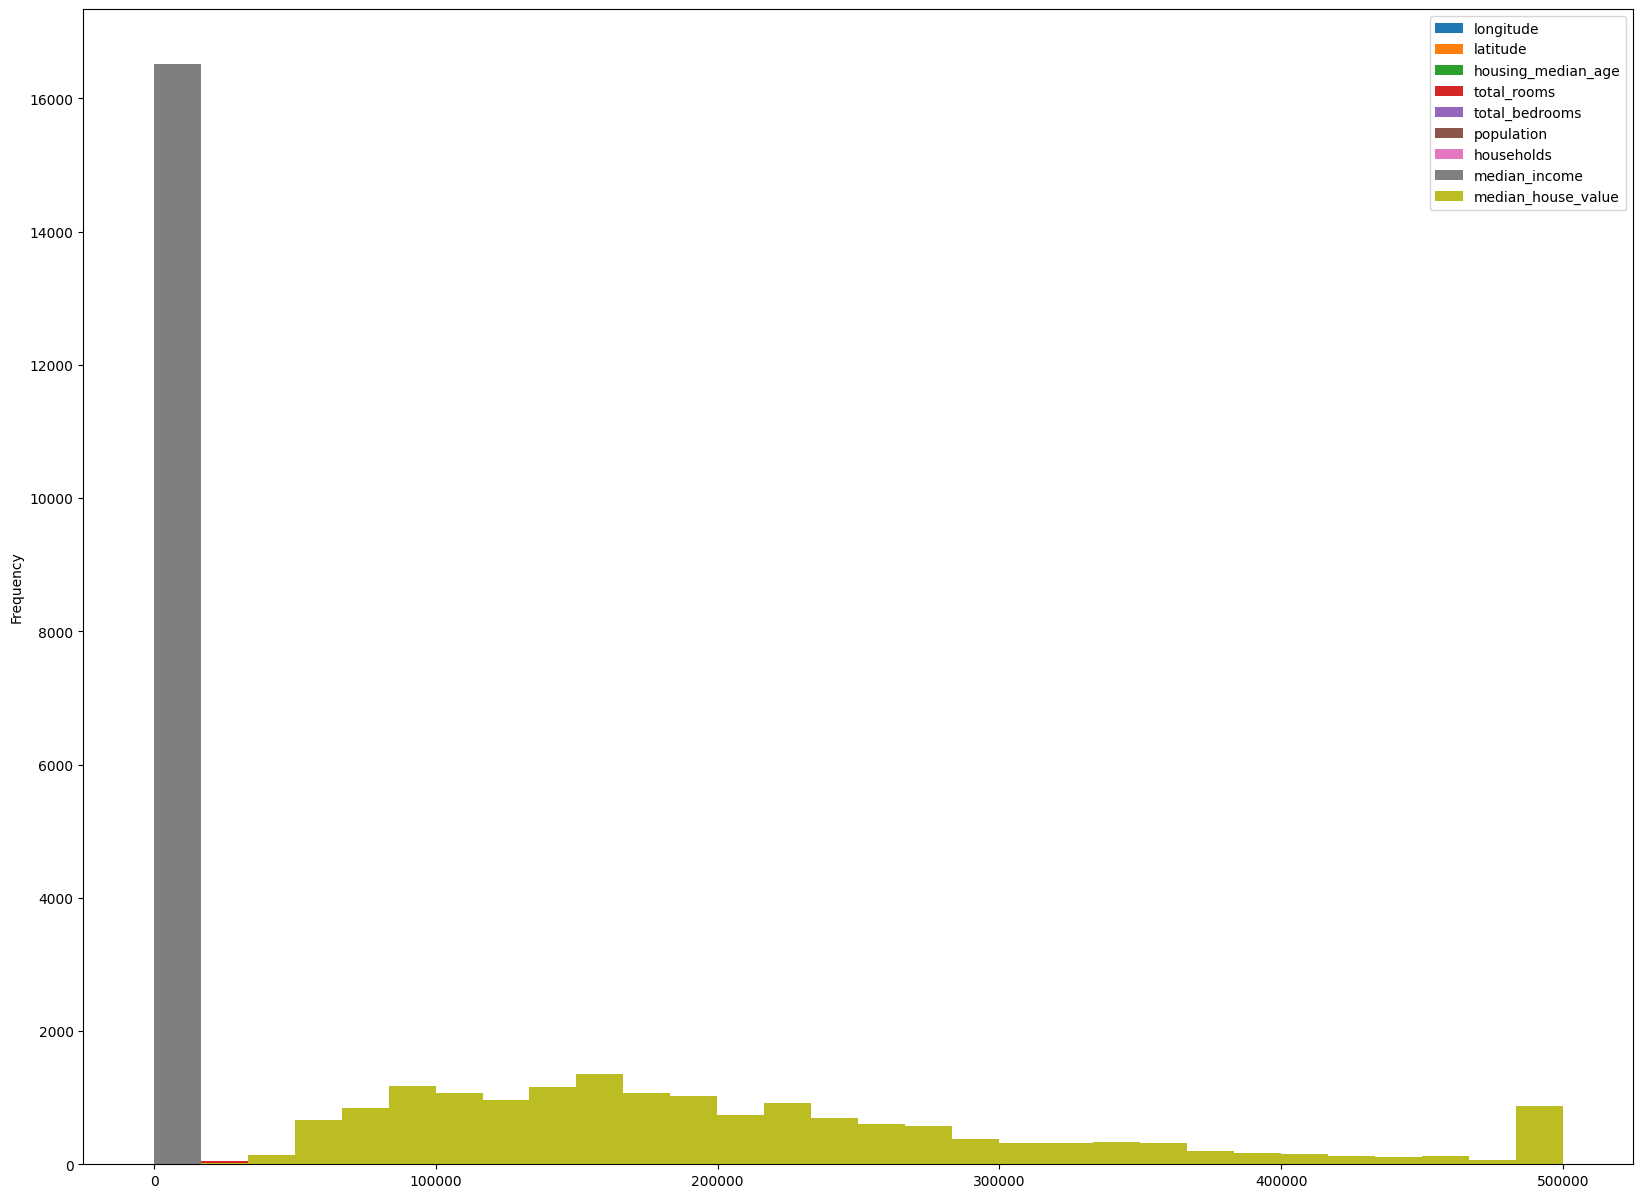

In [12]:
target_col = housing_data['median_house_value']
ax = housing_data.plot.hist(figsize=(20, 15), bins=30)
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()
housing_nas = housing_data.isna()